## The Single Neuron Linear Regression Model

The Single Neuron Linear Regression Model, often just referred to as Linear Regression when implemented using a single neuron, is a fundamental approach in machine learning for predicting a quantitative response. It's a basic form of neural network where a single neuron is used to model a linear relationship between input features and a continuous output variable. This model forms the cornerstone of many more complex algorithms and is a primary example of supervised learning.

### Concept
In the context of neural networks, a neuron can be thought of as a computational unit that performs a weighted sum of its inputs and outputs a value. In a Single Neuron Linear Regression Model, this neuron is used to predict a continuous value based on its inputs. The basic elements of this model include:

1. Inputs: These are the features or independent variables of your dataset. In a simple linear regression with one feature, there's only one input. In multiple linear regression, there are multiple inputs.

2. Weights: Each input is assigned a weight (often denoted as w). These weights represent the strength or coefficient of the respective inputs in determining the output.

3. Bias: This is an additional parameter (often denoted as b or the intercept in linear regression terms), allowing the model to fit the best line to the data.

4. Output: The output is the predicted value (often denoted as y). In a single neuron model for linear regression, it's calculated as a weighted sum of the inputs plus the bias.

### Mathematical Representation
The relationship modeled by a single neuron in linear regression can be mathematically represented as:

\\[ y = w_1x_1 + w_2x_2 + ... + w_nx_n + b \\]

where:
- \\( y \\) is the predicted value.
- \\( w_1, w_2, ..., w_n \\) are the weights.
- \\( x_1, x_2, ..., x_n \\) are the input features.
- \\( b \\) is the bias term.


## Applications


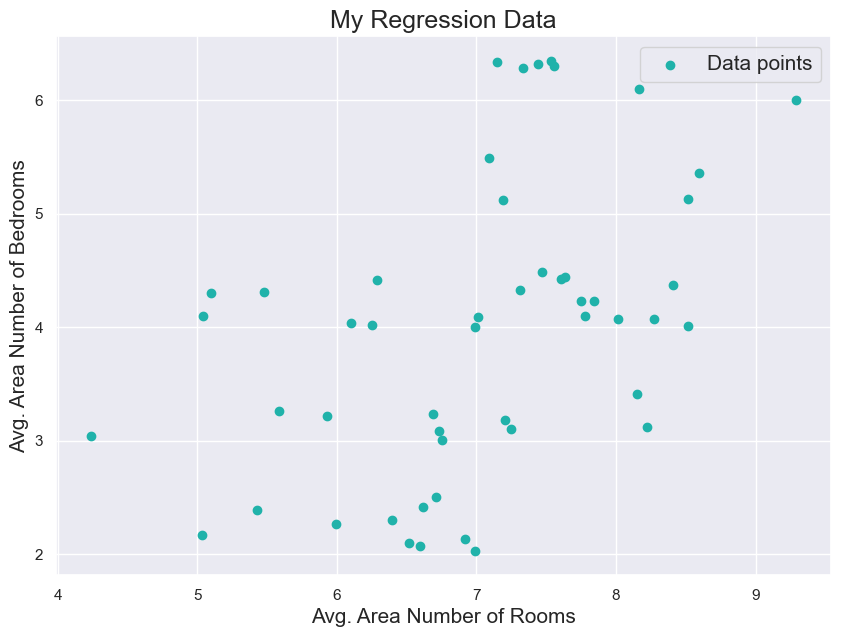

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("USA_Housing.csv")
df = df.iloc[:50][["Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms"]]

# Plotting
plt.figure(figsize=(10, 7))
plt.scatter(df["Avg. Area Number of Rooms"], 
            df["Avg. Area Number of Bedrooms"], 
            color="lightseagreen",
            label="Data points")
plt.xlabel("Avg. Area Number of Rooms", fontsize=15)
plt.ylabel("Avg. Area Number of Bedrooms", fontsize=15)
plt.legend(fontsize=15)
plt.title("My Regression Data", fontsize=18)
plt.show()


In [121]:
class SingleNeuron(object):
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                errors += .5*(error**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


In [122]:
X = df["Avg. Area Number of Rooms"].values
X = X.reshape(-1, 1)
y = df["Avg. Area Number of Bedrooms"].values

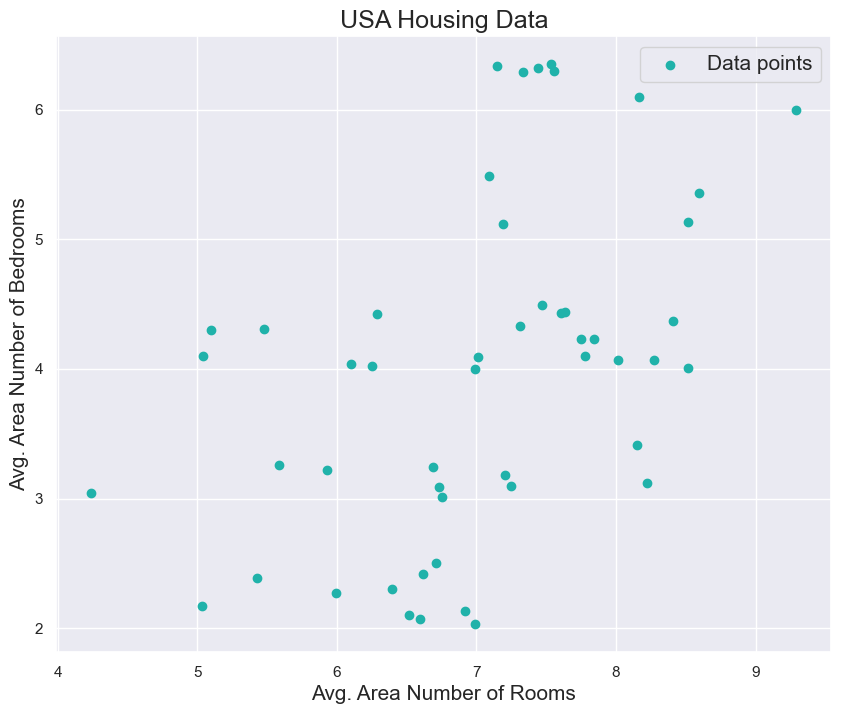

In [124]:
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Data points")
plt.xlabel("Avg. Area Number of Rooms", fontsize = 15)
plt.ylabel("Avg. Area Number of Bedrooms", fontsize = 15)
plt.title("USA Housing Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

In [125]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.0001, epochs = 5)


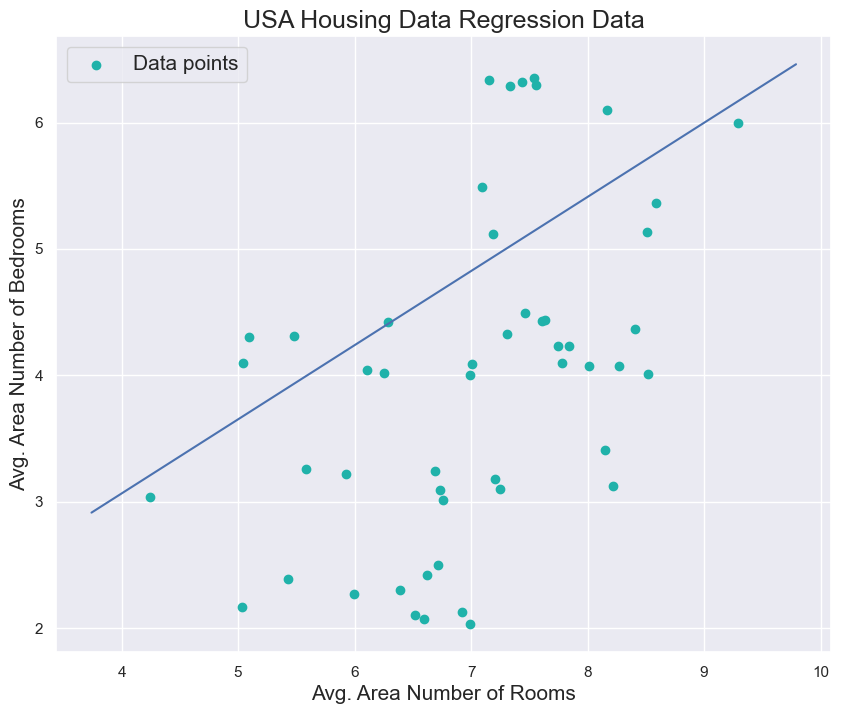

In [126]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Data points")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Avg. Area Number of Rooms", fontsize = 15)
plt.ylabel("Avg. Area Number of Bedrooms", fontsize = 15)
plt.title("USA Housing Data Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

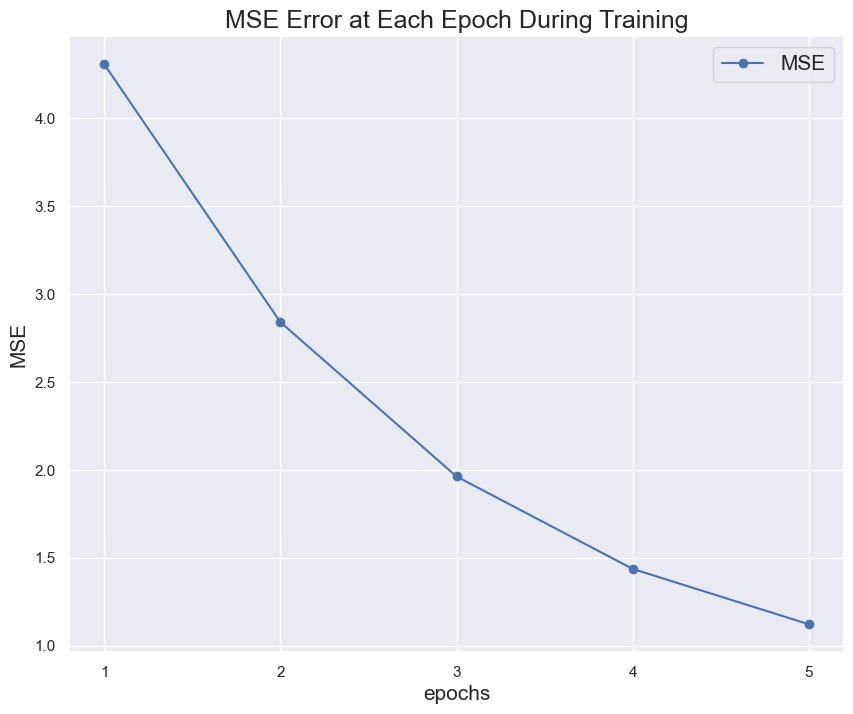

In [127]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

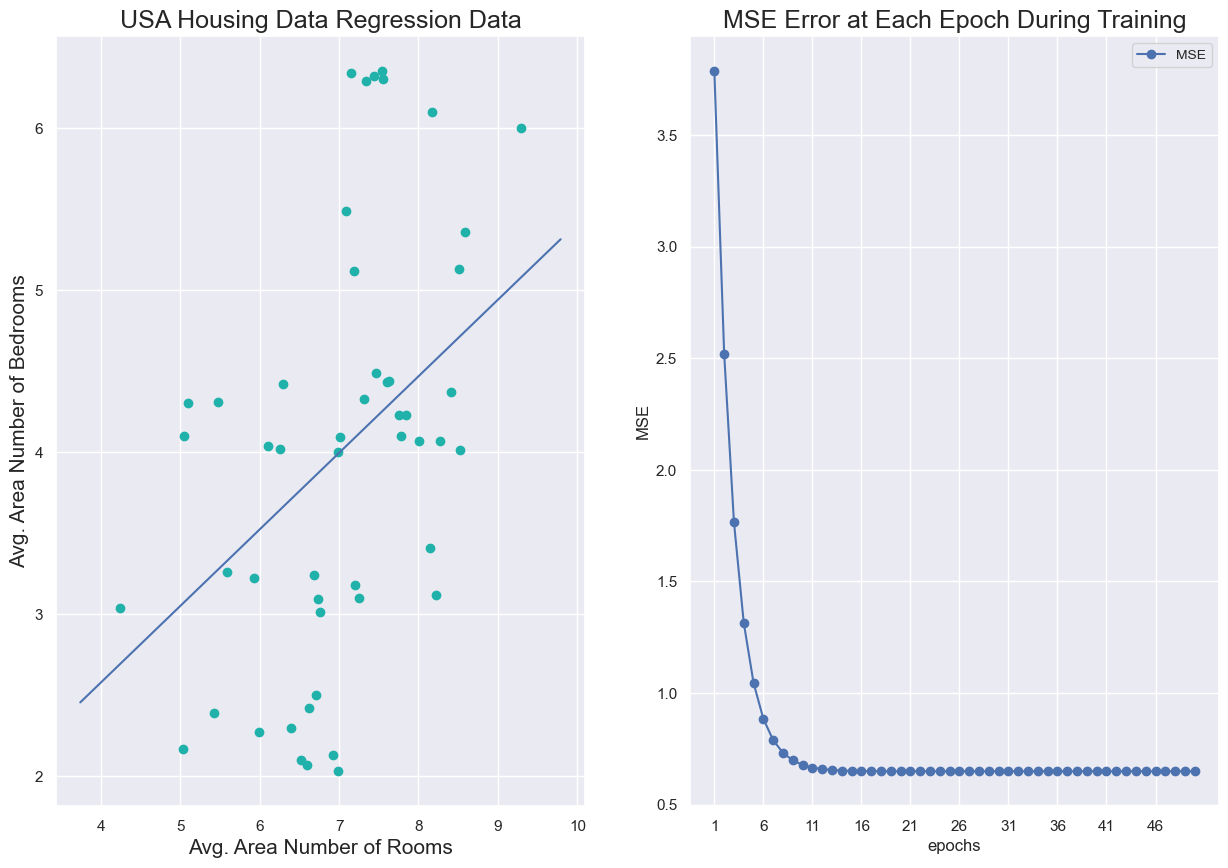

In [130]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("Avg. Area Number of Rooms", fontsize = 15)
ax1.set_ylabel("Avg. Area Number of Bedrooms", fontsize = 15)
ax1.set_title("USA Housing Data Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

/var/folders/28/lpv52qp960b7wkvvmcfl7z3w0000gn/T/ipykernel_40397/1448511825.py:16: RuntimeWarning: overflow encountered in scalar power
  errors += .5*(error**2)
/var/folders/28/lpv52qp960b7wkvvmcfl7z3w0000gn/T/ipykernel_40397/1448511825.py:14: RuntimeWarning: invalid value encountered in subtract
  self.w_[:-1] -= alpha*error*xi
/var/folders/28/lpv52qp960b7wkvvmcfl7z3w0000gn/T/ipykernel_40397/1448511825.py:15: RuntimeWarning: invalid value encountered in scalar subtract
  self.w_[-1] -= alpha*error


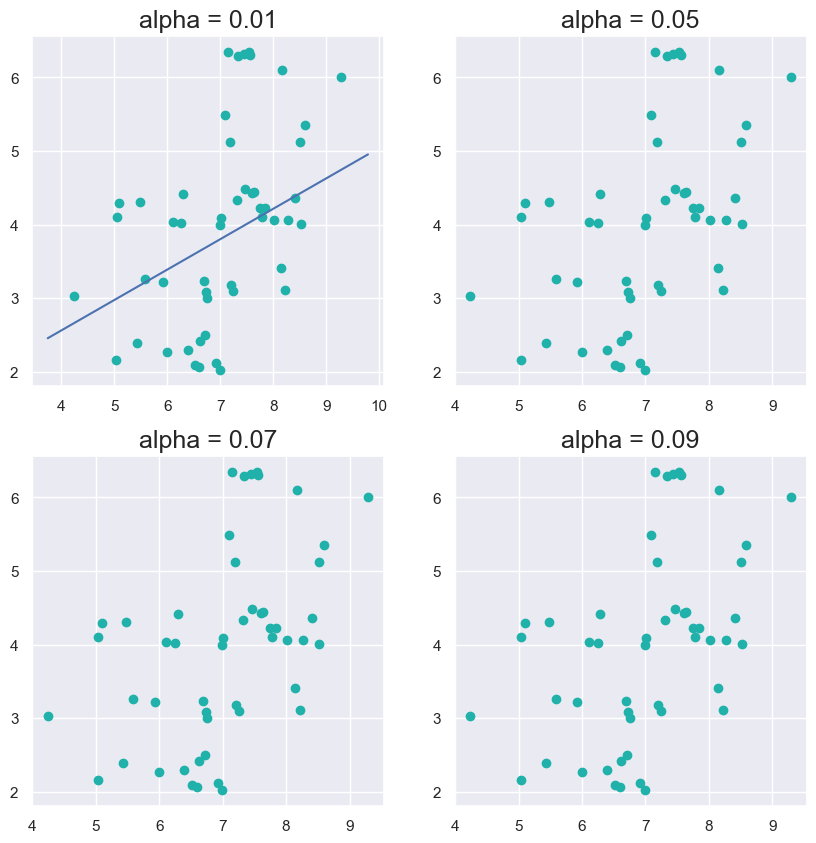

In [131]:
# Possible choices of learning rate 
alphas = [0.01, 0.05, 0.07, 0.09]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 1_000)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)

## Limitations
While powerful in its simplicity, the Single Neuron Linear Regression Model has limitations:

1. It assumes a linear relationship between inputs and outputs.
2. It's sensitive to outliers in the data.
3. It doesn't capture complex patterns in data, which more sophisticated models, like polynomial regression or neural networks with multiple layers and non-linear activation functions, can capture.
